In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import json
import os
import re
import sys

sys.path.append(os.path.expanduser("~/GitHub/multiplex-plot"))
sys.path.append(os.path.expanduser("~/GitHub/EvenTDT"))
sys.path.append(os.path.expanduser("~/GitHub/EvenTDT/eventdt"))

from eventdt.objects.exportable import Exportable

In [2]:
data_dir = os.path.expanduser("~/DATA/evaluation/ate/data/football/idf/")
event_names = [ 
                'BarcaAtleti', 'ManCityOL', 'TOTMUN', 'TOTLEI', 'AVLMUN',
                'AVLSHU', 'MCIARS', 'TOTMUN', 'BHAARS', 'AVLCHE',
              ]
event_idfs = [ os.path.join(data_dir, f"#{event}.json") for event in event_names ]
candidates = [ 'willian', 'chelsea', 'goal', 'yellow' ]

df = { candidate: { } for candidate in candidates }
for event_idf in event_idfs:
    with open(event_idf, 'r') as f:
        idf = Exportable.decode(json.loads(f.readline()))['tfidf']
        
    for term in candidates:
        df[term][event_idf] = (idf.global_scheme.idf.get(term, 0)/
                               idf.global_scheme.documents)

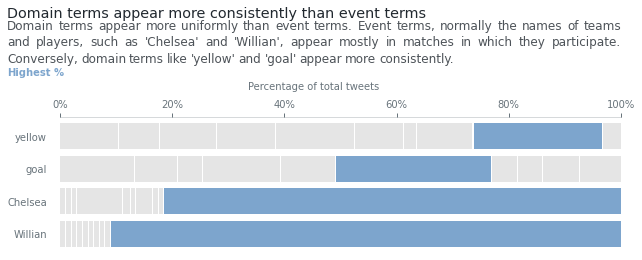

In [3]:
# import the Drawable class and set the style
from multiplex import drawable
drawable = importlib.reload(drawable)
plt.style.use(os.path.join(os.getcwd(), '..', 'modern-custom.style'))

# create general styles for the bars and the labels
style = { 'alpha': 0.5, 'color': '#CCCCCC' }
label_style = { 'alpha': 0.5, 'fontweight': 'bold' }

# create a specific style to highlight the biggest percentage
highlight = { 'alpha': 1, 'color': 'C1' }
highlight_label_style = { 'alpha': 1 }

# draw the visualization
figure = plt.figure(figsize=(11, 2.5))
viz = drawable.Drawable(figure)
for i, term in enumerate(candidates):
    values = [ { 'value': df[term][idf] } for idf in event_idfs ]
    highest = max(df[term], key=df[term].get)
    index = event_idfs.index(highest)
    values[index]['label'] = "Highest %"
    values[index]['label_style'] = highlight_label_style
    values[index]['style'] = highlight
    term = term if i > 1 else term.title()
    viz.draw_bar_100(values, term, min_percentage=1, pad=0.2,
                     label_style=label_style, **style)

# customize the plot
viz.set_xlabel('Percentage of total tweets')
viz.set_title('Domain terms appear more consistently than event terms', loc='left')
viz.set_caption(f"""Domain terms appear more uniformly than event terms.
                    Event terms, normally the names of teams and players, such as 'Chelsea' and 'Willian', appear mostly in matches in which they participate.
                    Conversely, domain terms like 'yellow' and 'goal' appear more consistently.""",
                align='justify')
viz.savefig('../exports/4.2-entropy.png', dpi=300, bbox_inches='tight')